### 1. The necessary libraries were imported

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import numpy as np
from scipy.stats import norm

### 2. The tickers for this analysis were downloaded from Yahoo Finance, and the downloaded data was displayed

In [59]:
tickers=["GOOG","PLTR","TLT","GLD","CL=F"]

start_date="2021-01-01"
end_date="2024-09-10"

for ticker in tickers:
    data=yf.download(ticker, start=start_date, end=end_date)
    print("\nTicker:", ticker,"\n", data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker: GOOG 
                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  87.876999  88.032501  85.392502  86.412003  86.200310  38038000
2021-01-05  86.250000  87.383499  85.900749  87.045998  86.832756  22906000
2021-01-06  85.131500  87.400002  84.949997  86.764503  86.551941  52042000
2021-01-07  87.002998  89.419998  86.852501  89.362503  89.143585  45300000
2021-01-08  89.399002  90.491997  88.676750  90.360497  90.139130  41012000

Ticker: PLTR 
                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  23.910000  24.500000  22.500000  23.370001  23.370001  44970400
2021-01-05  23.180000  24.670000  22.889999  24.600000  24.600000  29050400
2021-01-06  24.120001  24.459999  23.250000  23.540001  23.540001  32732900
2021-01-07  24.020000  25.190001  23.670000  25.000000  

In [60]:
adj_close=pd.DataFrame()

for ticker in tickers:
    data=yf.download(ticker, start=start_date, end=end_date)
    adj_close[ticker]=data['Adj Close']

print(adj_close)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                  GOOG       PLTR         TLT         GLD       CL=F
Date                                                                
2021-01-04   86.200310  23.370001  142.684525  182.330002  47.619999
2021-01-05   86.832756  24.600000  141.624863  182.869995  49.930000
2021-01-06   86.551941  23.540001  138.717499  179.899994  50.630001
2021-01-07   89.143585  25.000000  137.494812  179.479996  50.830002
2021-01-08   90.139130  25.200001  137.051056  173.339996  52.240002
...                ...        ...         ...         ...        ...
2024-09-03  158.401489  30.510000   97.750000  230.289993  70.339996
2024-09-04  157.602539  30.590000   99.010002  230.429993  69.199997
2024-09-05  158.391510  30.160000   99.570000  232.350006  69.150002
2024-09-06  151.930008  30.330000   99.559998  230.630005  67.669998
2024-09-09  149.539993  34.599998   99.989998  231.600006  68.709999

[926 rows x 5 columns]


### 3. The log returns of the tickers were calculated 

In [62]:
returns=pd.DataFrame()

for ticker in tickers:
    data=yf.download(ticker, start=start_date, end=end_date)
    data["Returns"]= np.log(data["Adj Close"] / data["Adj Close"].shift(1))
    returns[ticker]=data["Returns"].dropna()

print (returns)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                GOOG      PLTR       TLT       GLD      CL=F
Date                                                        
2021-01-05  0.007310  0.051293 -0.007454  0.002957  0.047369
2021-01-06 -0.003239 -0.044045 -0.020742 -0.016374  0.013922
2021-01-07  0.029504  0.060175 -0.008853 -0.002337  0.003942
2021-01-08  0.011106  0.007968 -0.003233 -0.034809  0.027362
2021-01-11 -0.022659  0.028557 -0.001654 -0.001963  0.000191
...              ...       ...       ...       ...       ...
2024-09-03 -0.040164 -0.031298  0.016223 -0.004333 -0.044625
2024-09-04 -0.005057  0.002619  0.012808  0.000608 -0.016340
2024-09-05  0.004994 -0.014157  0.005640  0.008298 -0.000723
2024-09-06 -0.041650  0.005621 -0.000100 -0.007430 -0.021635
2024-09-09 -0.015856  0.131716  0.004310  0.004197  0.015252

[925 rows x 5 columns]


### 4. The covariance matrix of the log returns was constructed

In [63]:
def expected_returns(weights, returns):
    return np.sum(returns.mean()*weights)

def standard_deviation (weights, cov_matrix):
    variance=weights.T@cov_matrix@weights
    return np.sqrt(variance)

In [64]:
cov_matrix=returns.cov()
print(cov_matrix)

          GOOG      PLTR       TLT       GLD      CL=F
GOOG  0.000383  0.000322  0.000011  0.000020  0.000029
PLTR  0.000322  0.001802  0.000041  0.000038  0.000040
TLT   0.000011  0.000041  0.000117  0.000030 -0.000040
GLD   0.000020  0.000038  0.000030  0.000080  0.000042
CL=F  0.000029  0.000040 -0.000040  0.000042  0.000566


### 5. The portfolio variance and standard deviation were calculated

The covariance matrix $( \text{cov\_m} )$ and weights $( \text{w} )$ are given by:

$$
\text{cov\_m} = 
\begin{bmatrix}
0.000383 & 0.000322 & 0.000011 & 0.000020 & 0.000029 \\
0.000322 & 0.001802 & 0.000041 & 0.000038 & 0.000040 \\
0.000011 & 0.000041 & 0.000117 & 0.000030 & -0.000040 \\
0.000020 & 0.000038 & 0.000030 & 0.000080 & 0.000042 \\
0.000029 & 0.000040 & -0.000040 & 0.000042 & 0.000566
\end{bmatrix},
\quad
\text{w} = 
\begin{bmatrix}
0.25 & 0.25 & 0.30 & 0.10 & 0.10
\end{bmatrix}
$$

The number of columns in the first matrix should equal the number of rows in the second. Thus, we transpose the weights matrix:

$$
\text{cov\_m} \times \text{w}^T = 
\begin{bmatrix}
0.000383 & 0.000322 & 0.000011 & 0.000020 & 0.000029 \\
0.000322 & 0.001802 & 0.000041 & 0.000038 & 0.000040 \\
0.000011 & 0.000041 & 0.000117 & 0.000030 & -0.000040 \\
0.000020 & 0.000038 & 0.000030 & 0.000080 & 0.000042 \\
0.000029 & 0.000040 & -0.000040 & 0.000042 & 0.000566
\end{bmatrix}
\times 
\begin{bmatrix}
0.25 \\
0.25 \\
0.30 \\
0.10 \\
0.10
\end{bmatrix}
=
\begin{bmatrix}
\frac{3689}{20000000} \\
\frac{5511}{10000000} \\
\frac{471}{10000000} \\
\frac{357}{10000000} \\
\frac{1321}{20000000}
\end{bmatrix}
$$

The variance of the portfolio $( \sigma_P^2 )$ is given by:

$$
\sigma_P^2 = \text{w} \times \text{cov\_m} \times \text{w}^T
$$


$$
\begin{bmatrix}
0.25 & 0.25 & 0.30 & 0.10 & 0.10
\end{bmatrix}
\times 
\begin{bmatrix}
\frac{3689}{20000000} \\
\frac{5511}{10000000} \\
\frac{471}{10000000} \\
\frac{357}{10000000} \\
\frac{1321}{20000000}
\end{bmatrix}
=
\begin{bmatrix}
\frac{83277}{400000000}
\end{bmatrix}
$$

The standard deviation of the portfolio $\,( \sigma_P)\,$ is: 

$$
\sigma_P = \sqrt{\sigma_P^2} = \sqrt{\frac{83277}{400000000}} \approx 0.0144
$$

In [152]:
portfolio_value=1000000
weights=[.25,.25,.30,.10,.10]
weights_array=np.array(weights)

portfolio_er=expected_returns(weights_array,returns)
portfolio_std=standard_deviation (weights_array, cov_matrix)
print(portfolio_std)

0.014426632781221839


### 6. The Value at Risk (VaR) of the portfolio was identified

In [66]:
def random_z_score():
    return np.random.normal(0,1)

def scenario_gain_loss(portfolio_std,portfolio_er,z_score,days):
    return portfolio_value * portfolio_er * days + portfolio_value * portfolio_std * z_score * np.sqrt(days)

In [67]:
days=10
simulations=10000
scenario_return=[]

for i in range(simulations):
    z_score=random_z_score()
    scenario_return.append(scenario_gain_loss(portfolio_std,portfolio_er,z_score,days))


In [68]:
confidence_interval=0.95
VaR=np.percentile(scenario_return,100*(1-confidence_interval))
print(VaR)

-72621.54311599203


### 7. The Monte Carlo Simulation was plotted to visualize the portfolio's VaR 

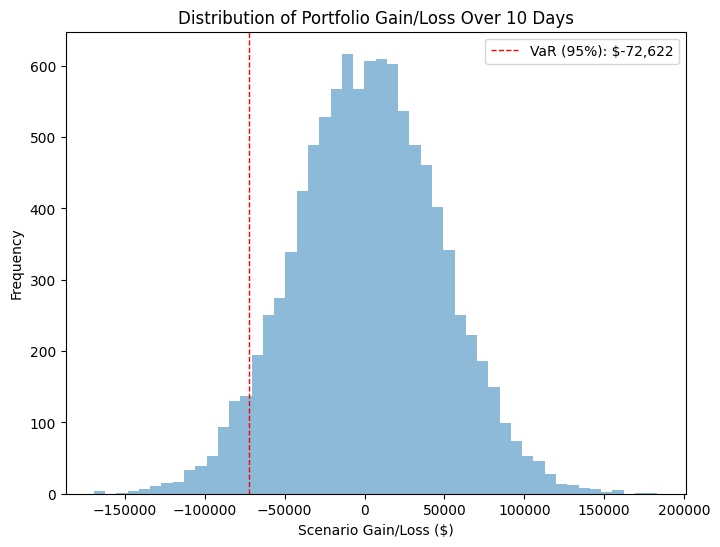

In [69]:
plt.figure(figsize=(8,6)) 
plt.hist(scenario_return,bins=50,alpha=0.5)
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.axvline(VaR, color='r', linestyle='dashed', linewidth=1, label=f'VaR ({confidence_interval:.0%}): ${VaR:,.0f}')
plt.legend(fontsize=10)
plt.show()